#**GOLDEN TICKET STUDY CASE NARASIO DATA**
Build By : Azmi Abiyyu Dzaky

Created : 06 August 2024 - 10 August 2024



# **Problem & Resource**



## **PROBLEM**

The company wants to know w**hat aspects influence Employee performance**

**which must be done**
1. create a model to see the relationship between independent variables and target variables
2. make recommendations for employee performance to the company

## **Resource**

**Raw_Dataset**: https://docs.google.com/spreadsheets/d/1h1KrqGFAU0rbAYdaxTvt3-By65PX4a9e/edit?usp=sharing&ouid=112247444839361227951&rtpof=true&sd=true

**Clean_Dataset** : https://drive.google.com/file/d/1LB8LtbOBAjo_qQeJkoRkWgJ3YN9x3wAq/view?usp=sharing





## Dataset Description


The dataset consists of 28 Columns and 1200 Rows of Data

1. **EmpNumber**: A unique employee number, used as an identifier.
2. **Age**: Employee's age.
3. **Gender**: Employee's gender (Male/Female).
4. **EducationBackground**: Employee's educational background (e.g., Marketing, Technical, etc.).
5. **MaritalStatus**: Employee's marital status (Single, Married, etc.).
6. **EmpDepartment**: Department where the employee works (Sales, HR, etc.).
7. **EmpJobRole**: Employee's job role (Manager, Sales Executive, etc.).
8. **BusinessTravelFrequency:** Frequency of employee's business travel (Rarely, Frequently, etc.).
9. **DistanceFromHome:** Distance from home to the workplace (in kilometers).
10. **EmpEducationLevel:** Employee's education level (on a numerical scale, e.g., 1 for High School, 2 for Diploma, etc.).
11. **EmpEnvironmentSatisfaction:** Employee's satisfaction with the work environment (scale 1-4).
12. **EmpHourlyRate:** Employee's hourly rate of pay.
13. **EmpJobInvolvement:** Employee's involvement in their job (scale 1-4).
14. **EmpJobLevel:** Employee's job level (hierarchical level).
15. **EmpJobSatisfaction:** Employee's satisfaction with their job (scale 1-4).
16. **NumCompaniesWorked**: Number of companies the employee has worked for.
17. **OverTime:** Employee's overtime status (Yes/No).
18. **EmpLastSalaryHikePercent:** Percentage of the employee's last salary hike.
19. **EmpRelationshipSatisfaction:** Employee's satisfaction with interpersonal relationships at work (scale 1-4).
20. **TotalWorkExperienceInYears:** Total work experience of the employee in years.
21. **TrainingTimesLastYear:** Number of training sessions attended by the employee last year.
22. **EmpWorkLifeBalance:** Work-life balance (scale 1-4).
23. **ExperienceYearsAtThisCompany:** Years of experience working at the current company.
24. **ExperienceYearsInCurrentRole:** Years of experience in the current role.
25. **YearsSinceLastPromotion:** Number of years since the last promotion.
26. **YearsWithCurrManager:** Number of years working with the current manager.
27. **Attrition:** Whether the employee is still working or has left (Yes/No).
28. **PerformanceRating:** Employee's performance rating (numerical scale).


# **Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from datetime import datetime
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.preprocessing import MinMaxScaler

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1h1KrqGFAU0rbAYdaxTvt3-By65PX4a9e/edit?usp=sharing&ouid=112247444839361227951&rtpof=true&sd=true'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_excel(url)

# **EXPLORATORY DATA ANALYST**

In [ ]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

There are 28 columns with data equally distributed across 1200 data

In [ ]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


## **Drop EmpNumber Column**


Because the EmpNumber column is the same as the ID in the data, it is not really needed during the modeling process.

In [ ]:
df.drop('EmpNumber', axis=1, inplace=True)

## **Missing Value Check**

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
EducationBackground,0
MaritalStatus,0
EmpDepartment,0
EmpJobRole,0
BusinessTravelFrequency,0
DistanceFromHome,0
EmpEducationLevel,0
EmpEnvironmentSatisfaction,0


as seen, there are no missing values ​​in the dataset

## **Duplicated Data Check**

In [ ]:
duplicates = df.duplicated().sum()
print(f"Jumlah Duplikasi Data: {duplicates}")

Jumlah Duplikasi Data: 0


In [ ]:
duplicated_rows = df[df.duplicated(keep=False)]
print(duplicated_rows)


Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []


no duplicate datasets

## **Checking Outlier**

### Define Function TO Detect Outlier IQR

In [ ]:
# DETECT OUTLIER IQR
def detect_outlier_iqr(data) :
  outliers = []
  data = sorted(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)

  IQR = q3-q1
  lwr_bound = q1-(1.5 * IQR)
  upr_bound = q3 + (1.5 * IQR)

  for i in data:
    # print("ga masuk if")
    if(i < lwr_bound or i >upr_bound):
      # print("masuk sini")
      outliers.append(i)
  return outliers

In [ ]:
#  DETECT OUTLIER ZSCORE
def detect_outliers_zscore(data):
  outliers = []
  treshold = 3
  mean = np.mean(data)
  std = np.std(data)
  print("Mean : ", mean)
  print("Std : ", std)
  for i in data:
    z_score = (i-mean)/std
    if(np.abs(z_score) > treshold) :
      outliers.append(i)
  return outliers

### Check Outliers for All Columns (Int)

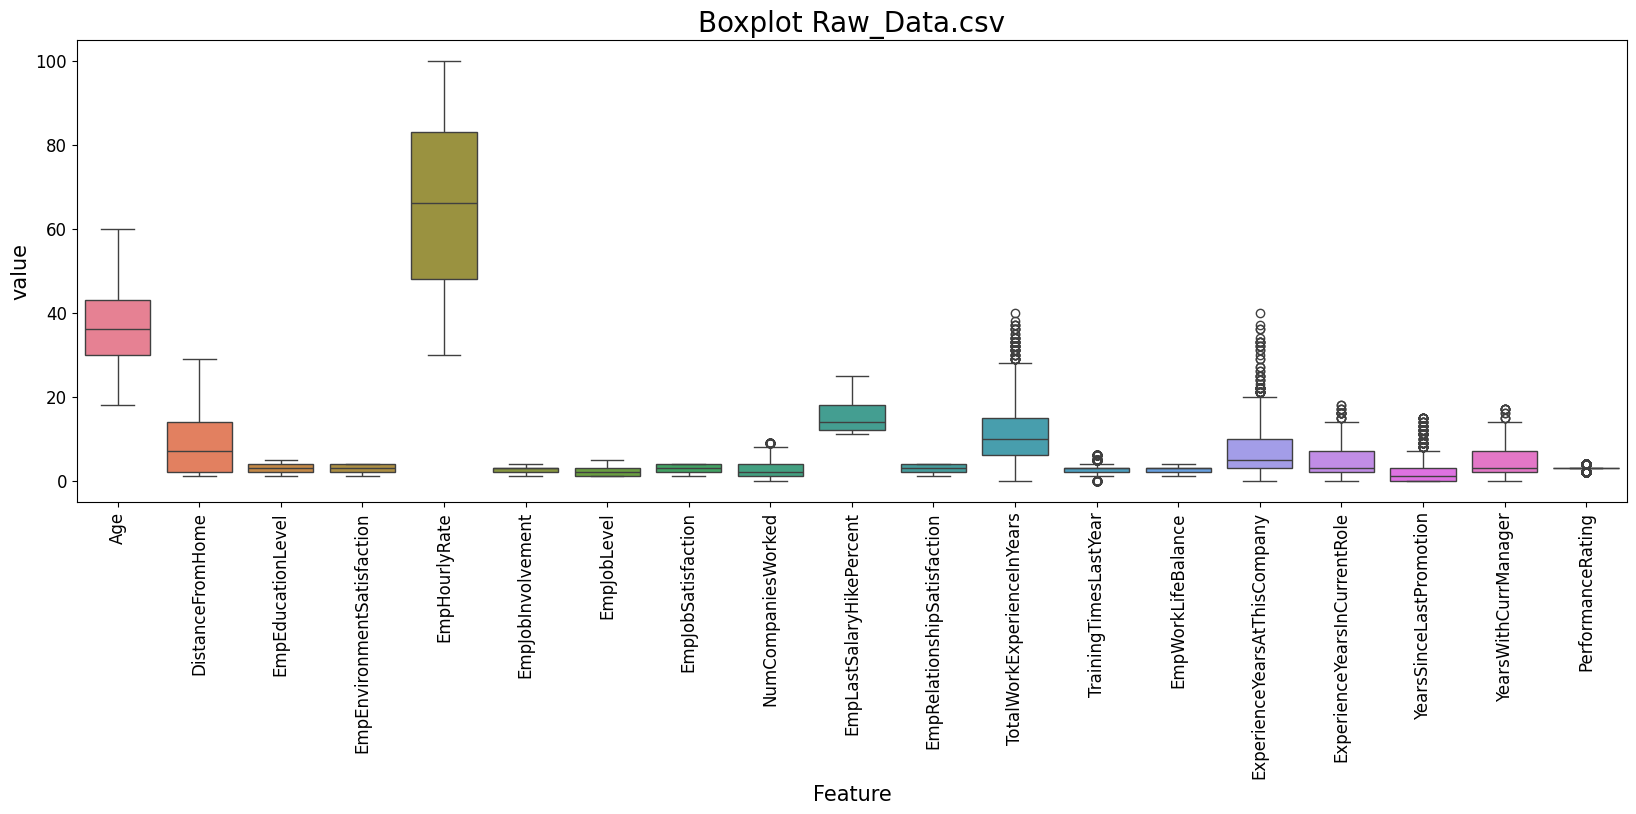

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df.iloc[:, :])

plt.title("Boxplot Raw_Data.csv", fontsize=20)
plt.xlabel("Feature", fontsize=15)
plt.ylabel("value", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

**There are outliers in the column**
1. NumCompaniesWorked
2. TotaWorkExperienceInYears
3. TrainingTimesLastYear
4. ExperienceYearAtThisCompany
5. ExperienceYearsInCurrentRole
6. YearsSinceLastPromotion
7. YearsWithCurrManager
8. PerformanceRating

### Outliers NumCompaniesWorked

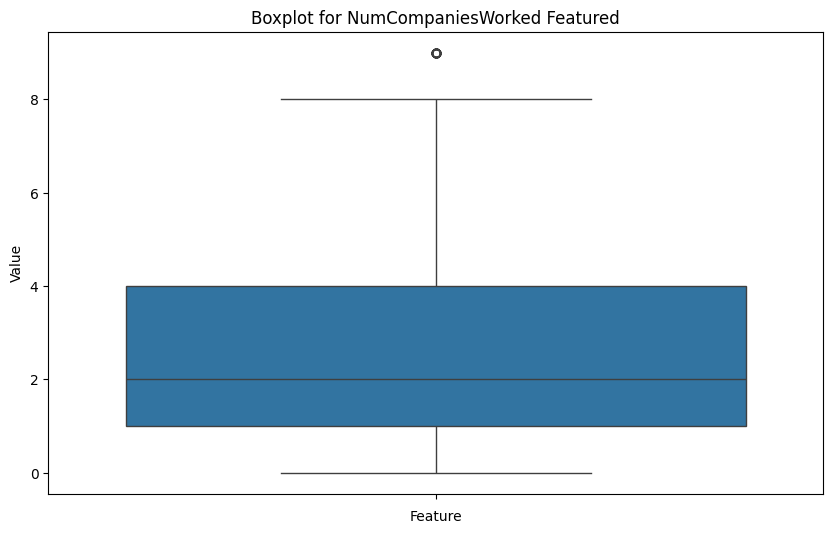

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['NumCompaniesWorked'])
plt.title("Boxplot for NumCompaniesWorked Featured")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [ ]:
outlier_NumCompaniesWorked = detect_outlier_iqr(df['NumCompaniesWorked'])
print("outliers result ", len(outlier_NumCompaniesWorked), ": ", outlier_NumCompaniesWorked)

outliers result  39 :  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


### Outliers TotaWorkExperienceInYears

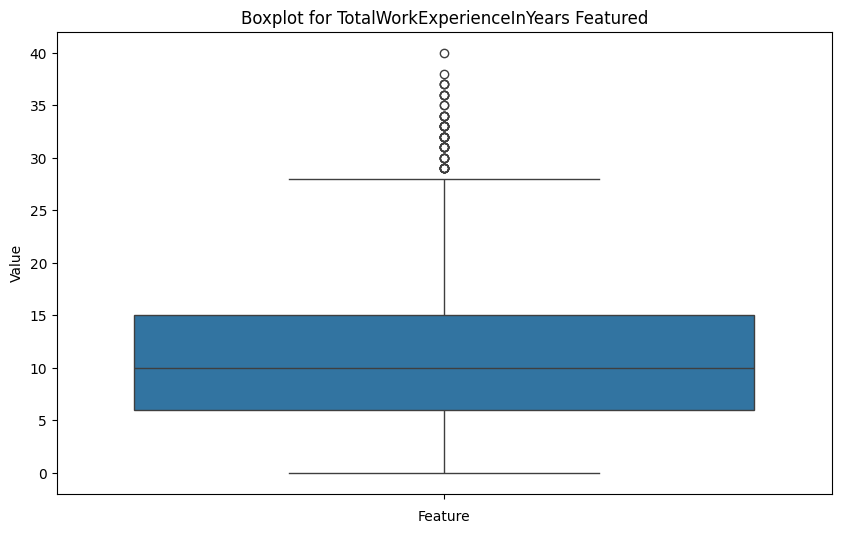

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['TotalWorkExperienceInYears'])
plt.title("Boxplot for TotalWorkExperienceInYears Featured")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [ ]:
outlier_TotalWorkExperienceInYears = detect_outlier_iqr(df['TotalWorkExperienceInYears'])
print("outliers result ", len(outlier_TotalWorkExperienceInYears), ": ", outlier_TotalWorkExperienceInYears)

outliers result  51 :  [29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 36, 36, 36, 36, 37, 37, 37, 38, 40]


### Outliers TrainingTimesLastYear

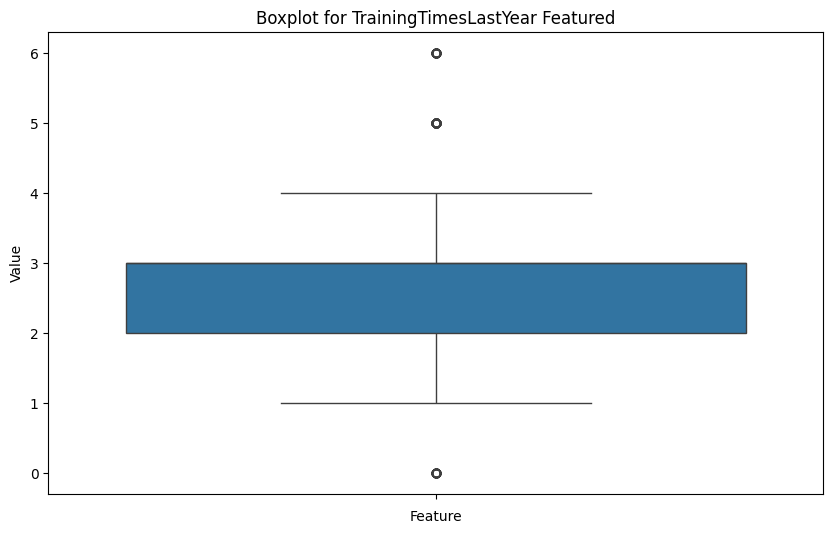

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['TrainingTimesLastYear'])
plt.title("Boxplot for TrainingTimesLastYear Featured")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [ ]:
outlier_TrainingTimesLastYear = detect_outlier_iqr(df['TrainingTimesLastYear'])
print("outliers result ", len(outlier_TrainingTimesLastYear), ": ", outlier_TrainingTimesLastYear)

outliers result  188 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


### Outliers ExperienceYearAtThisCompany

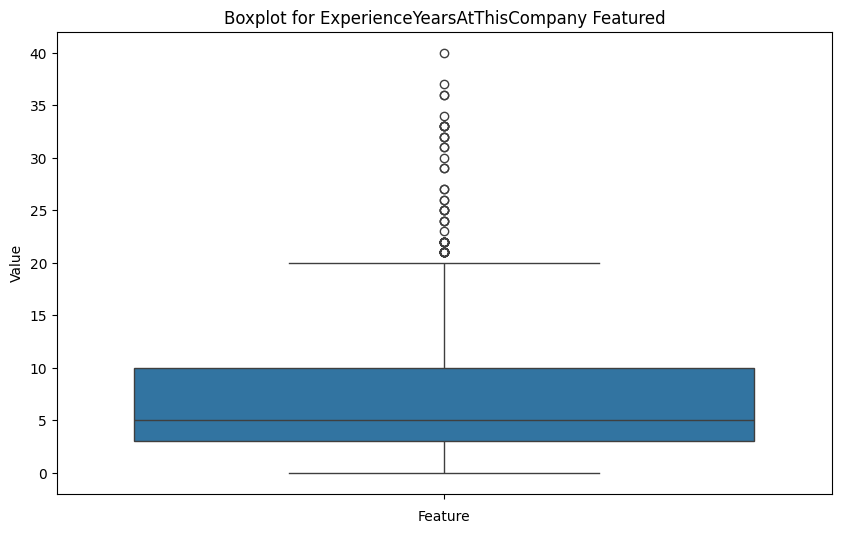

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['ExperienceYearsAtThisCompany'])
plt.title("Boxplot for ExperienceYearsAtThisCompany Featured")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [ ]:
outlier_ExperienceYearsAtThisCompany = detect_outlier_iqr(df['ExperienceYearsAtThisCompany'])
print("outliers result ", len(outlier_ExperienceYearsAtThisCompany), ": ", outlier_ExperienceYearsAtThisCompany)

outliers result  56 :  [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 24, 24, 24, 25, 25, 25, 25, 26, 26, 27, 27, 29, 29, 30, 31, 31, 32, 32, 32, 33, 33, 33, 33, 33, 34, 36, 36, 37, 40]


### Outliers ExperienceYearsInCurrentRole

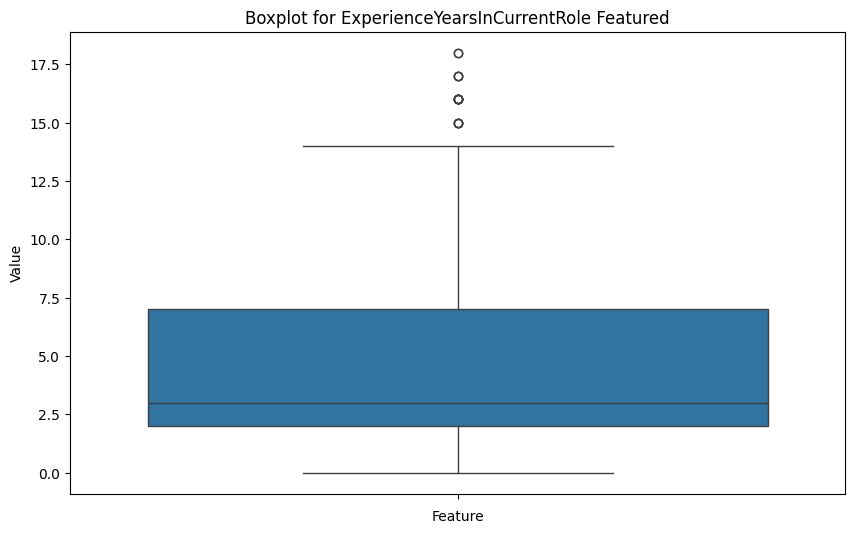

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['ExperienceYearsInCurrentRole'])
plt.title("Boxplot for ExperienceYearsInCurrentRole Featured")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [ ]:
outlier_ExperienceYearsInCurrentRole = detect_outlier_iqr(df['ExperienceYearsInCurrentRole'])
print("outliers result ", len(outlier_ExperienceYearsInCurrentRole), ": ", outlier_ExperienceYearsInCurrentRole)

outliers result  16 :  [15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 18, 18]


### Outliers YearsSinceLastPromotion

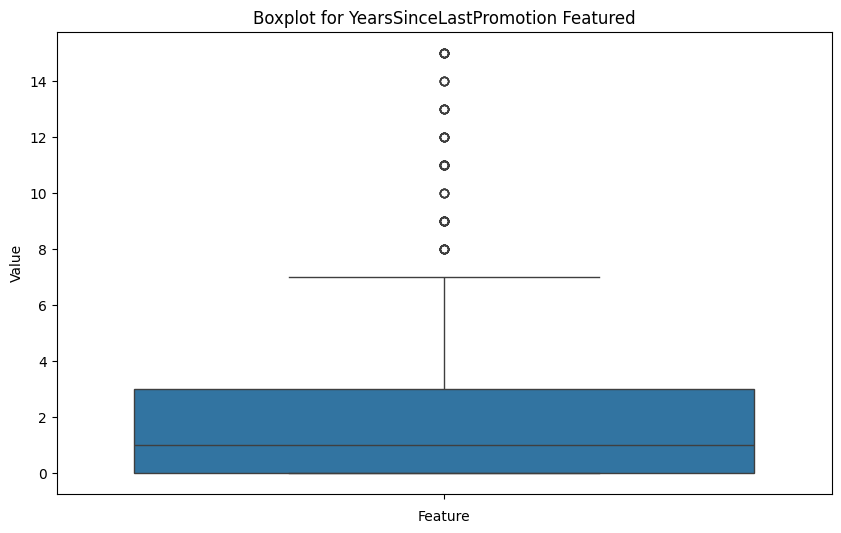

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['YearsSinceLastPromotion'])
plt.title("Boxplot for YearsSinceLastPromotion Featured")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [ ]:
outlier_YearsSinceLastPromotion = detect_outlier_iqr(df['YearsSinceLastPromotion'])
print("outliers results ", len(outlier_YearsSinceLastPromotion), ": ", outlier_YearsSinceLastPromotion)

outliers results  88 :  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]


### Outliers YearsWithCurrManager

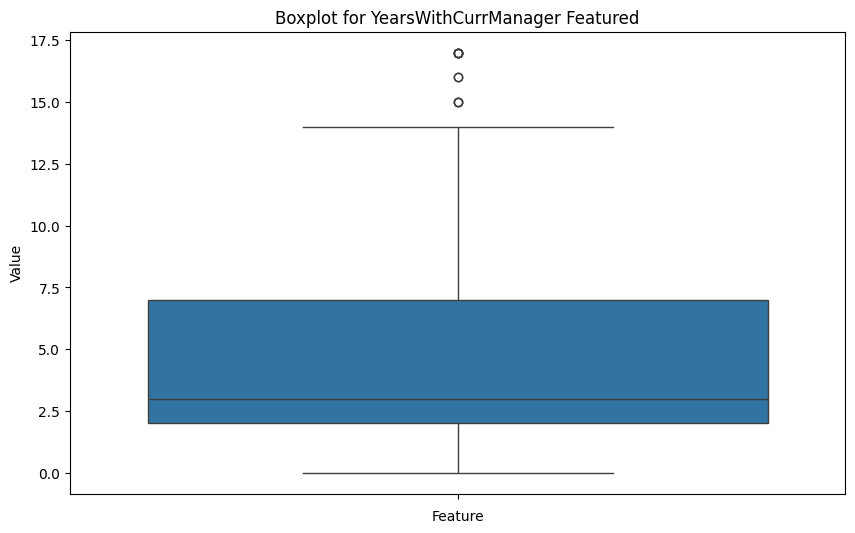

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['YearsWithCurrManager'])
plt.title("Boxplot for YearsWithCurrManager Featured")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [ ]:
outlier_YearsWithCurrManager = detect_outlier_iqr(df['YearsWithCurrManager'])
print("outliers results ", len(outlier_YearsWithCurrManager), ": ", outlier_YearsWithCurrManager)

outliers results  11 :  [15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17]


### Outliers PerformanceRating

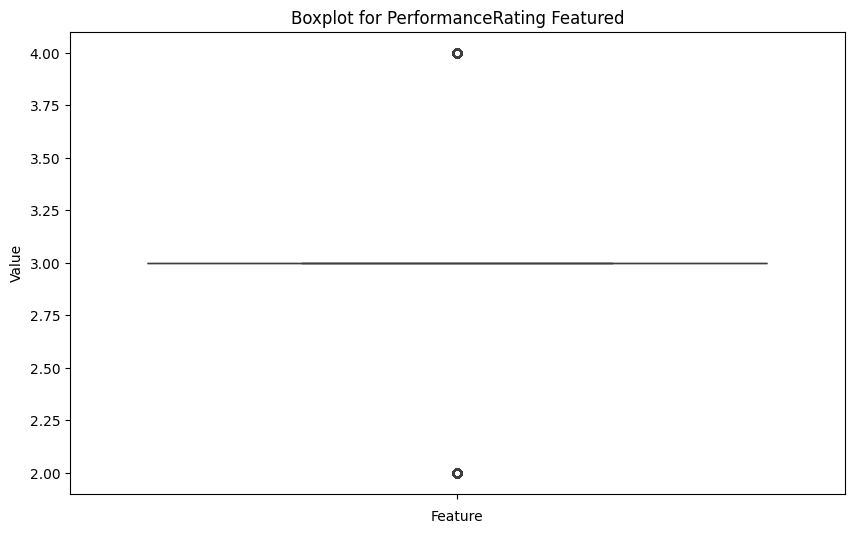

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['PerformanceRating'])
plt.title("Boxplot for PerformanceRating Featured")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [ ]:
outlier_PerformanceRating = detect_outlier_iqr(df['PerformanceRating'])
print("outliers results ", len(outlier_PerformanceRating), ": ", outlier_PerformanceRating)

outliers results  326 :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
# df['PerformanceRating'].value_counts()

In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,1022
Yes,178


## **Outliers Handled**

***I chose not to handle the outliers*** because I believe the values are still reasonable and reflect important variations in the data. While I did attempt to address them, the results showed minimal impact, so I decided to retain the outliers to preserve the natural variation within the feature.

# **Preprocessing Data**

## **ENCODING DATA**

List Of Categorical Data :
1. Gender
2. EducationBackground
3. MaritalStatus
4. EmpDepartement
5. EmpJobRole
6. BusinessTravelFrequeny
7. Overtime

In [ ]:
real_data = df.copy()
label_encoder = LabelEncoder()

### Encoding Gender

0 : Female    
1 : Male

In [ ]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,1,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,1,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [ ]:
print("Real Value From Label Encoding")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{i}: {class_label}")

Real Value From Label Encoding
0: Female
1: Male


### Encoding EducationBackground

0. Human Resources
1. Life Resources
2. Marketing
3. Medical
4. Other
5. Technical Degree

In [ ]:
df['EducationBackground'] = label_encoder.fit_transform(df['EducationBackground'])

In [ ]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,1,2,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,1,1,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,1,0,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,1,2,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [ ]:
print("Real Value From Label Encoding")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{i}: {class_label}")

Real Value From Label Encoding
0: Human Resources
1: Life Sciences
2: Marketing
3: Medical
4: Other
5: Technical Degree


### Encoder MaritalStatus

0. Divorced
1. Married
2. Single

In [ ]:
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])

In [ ]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,1,2,2,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,1,1,1,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,1,0,0,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,1,2,2,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [ ]:
print("Real Value From Label Encoding")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{i}: {class_label}")

Real Value From Label Encoding
0: Divorced
1: Married
2: Single


###Encoder EmpDepartement

0. Data Science
1. Development
2. Finance
3. Human Resources
4. Research & Development
5. Sales

In [ ]:
df['EmpDepartment'] = label_encoder.fit_transform(df['EmpDepartment'])

In [ ]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,1,2,2,5,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,1,1,1,5,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,1,0,0,3,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,1,2,2,5,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [ ]:
print("Real Value From Label Encoding")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{i}: {class_label}")

Real Value From Label Encoding
0: Data Science
1: Development
2: Finance
3: Human Resources
4: Research & Development
5: Sales


### Encoder EmpJobRole

0. Business Analyst
1. Data Scientist
2. Delivery Manager
3. Developer
4. Finance Manager
5. Healthcare Representative
6. Human Resources
7. Laboratory Technician
8. Manager
9. Manager R&D
10. Manufacturing Director
11. Research Director
12. Research Scientist
13. Sales Executive
14. Sales Representative
15. Senior Developer
16. Senior Manager R&D
17. Technical Architect
18. Technical Lead

In [ ]:
df['EmpJobRole'] = label_encoder.fit_transform(df['EmpJobRole'])

In [ ]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,1,2,2,5,13,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,1,1,1,5,13,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,1,0,0,3,8,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,1,2,2,5,13,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [ ]:
print("Real Value From Label Encoding")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{i}: {class_label}")

Real Value From Label Encoding
0: Business Analyst
1: Data Scientist
2: Delivery Manager
3: Developer
4: Finance Manager
5: Healthcare Representative
6: Human Resources
7: Laboratory Technician
8: Manager
9: Manager R&D
10: Manufacturing Director
11: Research Director
12: Research Scientist
13: Sales Executive
14: Sales Representative
15: Senior Developer
16: Senior Manager R&D
17: Technical Architect
18: Technical Lead


### Encoder BusinessTravelFrequency

0. Non-Travel
1. Travel_Frequently
2. Travel_Rarely

In [ ]:
df['BusinessTravelFrequency'] = label_encoder.fit_transform(df['BusinessTravelFrequency'])

In [ ]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [ ]:
print("Real Value From Label Encoding")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{i}: {class_label}")

Real Value From Label Encoding
0: Non-Travel
1: Travel_Frequently
2: Travel_Rarely


### Encoder Overtime

0. No
1. Yes

In [ ]:
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])

In [ ]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,No,3
1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,No,3
2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,No,4
3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,No,3
4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,No,3


In [ ]:
print("Real Value From Label Encoding")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{i}: {class_label}")

Real Value From Label Encoding
0: No
1: Yes


### Encoding Attrition

0. No
1. Yes

In [ ]:
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

In [ ]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3


In [ ]:
print("Real Value From Label Encoding")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{i}: {class_label}")

Real Value From Label Encoding
0: No
1: Yes


In [ ]:
# df.save_csv('clean_dataset.csv')

## **FEATURE SELECTION** (Chi Square)


Chi-Square is suitable because my target, PerformanceRating, is ordinal data with graded values. This method measures the relationship between categorical features and targets, thus helping to find the features that have the most influence on employee performance.

In [ ]:
url = 'https://drive.google.com/file/d/1LB8LtbOBAjo_qQeJkoRkWgJ3YN9x3wAq/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10.0,2,2,10.0,7.0,0.0,8.0,0,3
1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20.0,2,3,7.0,7.0,1.0,7.0,0,3
2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20.0,2,3,18.0,13.0,1.0,12.0,0,4
3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23.0,2,2,5.0,6.0,1.0,6.0,0,3
4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10.0,1,3,2.0,2.0,2.0,2.0,0,3


In [ ]:
# Split Data Train and Target (PerformanceRating)
X = df.drop(columns=['PerformanceRating'])
y = df['PerformanceRating']

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_scaled, y)

SelectKBest(k='all', score_func=<function chi2 at 0x7b59036b0b80>)

In [ ]:
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_scaled, y)
chi2_scores = pd.DataFrame({'Feature': X.columns, 'Score': chi2_selector.scores_})

In [ ]:
chi2_scores_sorted = chi2_scores.sort_values(by='Score', ascending=False)
print(chi2_scores_sorted)

                         Feature      Score
16      EmpLastSalaryHikePercent  76.514704
9     EmpEnvironmentSatisfaction  58.401005
23       YearsSinceLastPromotion  21.620079
4                  EmpDepartment   9.357402
15                      OverTime   7.963530
24          YearsWithCurrManager   7.019831
22  ExperienceYearsInCurrentRole   5.839888
21  ExperienceYearsAtThisCompany   4.094218
12                   EmpJobLevel   3.036011
25                     Attrition   2.186305
20            EmpWorkLifeBalance   2.033020
5                     EmpJobRole   1.994231
18    TotalWorkExperienceInYears   1.628788
7               DistanceFromHome   0.747640
3                  MaritalStatus   0.616005
6        BusinessTravelFrequency   0.505682
10                 EmpHourlyRate   0.468125
0                            Age   0.240230
17   EmpRelationshipSatisfaction   0.188520
14            NumCompaniesWorked   0.134262
8              EmpEducationLevel   0.119994
11             EmpJobInvolvement

only the top 10 are taken for the features that will be included in the model

In [ ]:
selected_features = chi2_scores.nlargest(10, 'Score')['Feature'].tolist()
print("Feature with Threshold Score > 10:", selected_features)

Feature with Threshold Score > 10: ['EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction', 'YearsSinceLastPromotion', 'EmpDepartment', 'OverTime', 'YearsWithCurrManager', 'ExperienceYearsInCurrentRole', 'ExperienceYearsAtThisCompany', 'EmpJobLevel', 'Attrition']


# **MODELLING** (Linear Logistic Ordinal)

The Linear Logistic Ordinal model was chosen because this model was created specifically for ordinal data where my target, namely "PerformanceRating", has a range of 2 - 4

In [ ]:
# Define The Data/Prepared Data
X = df[selected_features]
y = df['PerformanceRating']

In [ ]:
X.head()

,EmpLastSalaryHikePercent,EmpEnvironmentSatisfaction,YearsSinceLastPromotion,EmpDepartment,OverTime,YearsWithCurrManager,ExperienceYearsInCurrentRole,ExperienceYearsAtThisCompany,EmpJobLevel,Attrition
0,12,4,0.0,5,0,8.0,7.0,10.0,2,0
1,12,4,1.0,5,0,7.0,7.0,7.0,2,0
2,21,4,1.0,5,1,12.0,13.0,18.0,3,0
3,15,2,1.0,3,0,6.0,6.0,5.0,5,0
4,14,1,2.0,5,0,2.0,2.0,2.0,2,0


In [ ]:
y.head()

,PerformanceRating
0,3
1,3
2,4
3,3
4,3


In [ ]:
# Splitting the data into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total Data Train: {len(X_train)}")
print(f"Total Data Test: {len(X_test)}")

Total Data Train: 960
Total Data Test: 240


In [ ]:
# Define The Model (Linear Logistic Ordinal)
model = OrderedModel(y_train, X_train, distr='logit')

In [ ]:
model_fit = model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.554559
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36


In [ ]:
print(model_fit.summary())

                             OrderedModel Results                             
Dep. Variable:      PerformanceRating   Log-Likelihood:                -532.38
Model:                   OrderedModel   AIC:                             1089.
Method:            Maximum Likelihood   BIC:                             1147.
Date:                Mon, 09 Sep 2024                                         
Time:                        02:24:03                                         
No. Observations:                 960                                         
Df Residuals:                     948                                         
Df Model:                          10                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
EmpLastSalaryHikePercent         0.3114      0.026     11.937      0.000       0.260       0.36

In [ ]:
predictions = model_fit.predict(X_test)
print(predictions)

             0         1         2
1178  0.082770  0.879008  0.038222
865   0.296328  0.695228  0.008444
101   0.049325  0.886025  0.064650
439   0.030273  0.866689  0.103038
58    0.078282  0.881204  0.040514
...        ...       ...       ...
382   0.199599  0.786224  0.014177
867   0.037882  0.878641  0.083476
542   0.116212  0.857239  0.026548
1193  0.076917  0.881821  0.041262
874   0.138090  0.840017  0.021894

[240 rows x 3 columns]


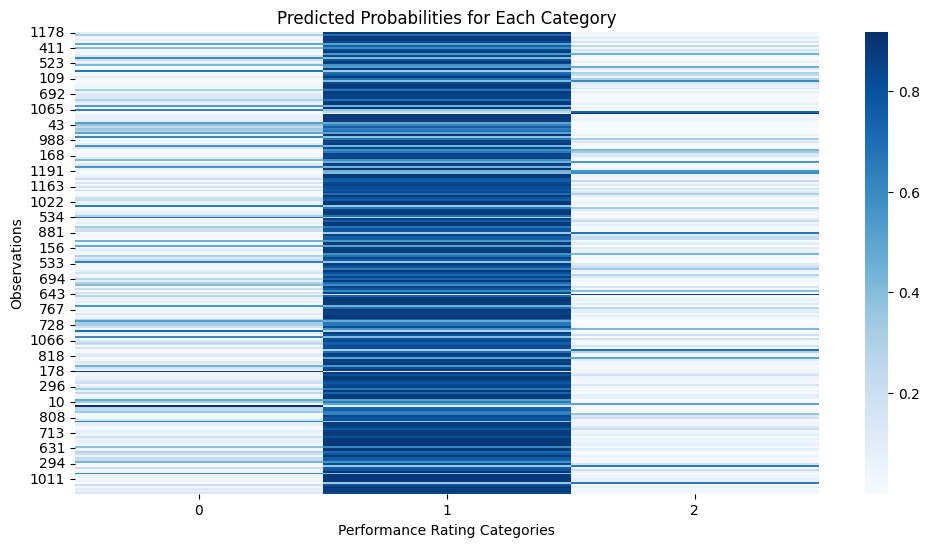

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(predictions, annot=False, cmap='Blues', cbar=True)
plt.title('Predicted Probabilities for Each Category')
plt.xlabel('Performance Rating Categories')
plt.ylabel('Observations')
plt.show()

In [ ]:
predictions = model_fit.predict(X_test)

predicted_indices = np.argmax(predictions, axis=1)
index_to_category = {0: 2, 1: 3, 2: 4}
predicted_categories = np.array([index_to_category[idx] for idx in predicted_indices])
print(f"Predicted categories include: {np.unique(predicted_categories)}")

actual_categories = y_test
accuracy = accuracy_score(actual_categories, predicted_categories)

print(f'Model Accuracy: {accuracy:.2%}')

Predicted categories include: [2 3 4]
Model Accuracy: 77.50%


# **RESULT**

## Result

Based on the model created, the following conclusions can be drawn about the factors influencing employee performance at the company:

**1. Work Environment Satisfaction(EmpEnvironmentSatisfaction)**

This variable has the strongest impact on employee performance (PerformanceRating). The highest coefficient (1.2117) indicates that the more satisfied employees are with their work environment, the higher their performance. This is supported by a highly significant p-value (0.000), indicating a strong and reliable relationship. The confidence interval (1.030 - 1.393) is entirely positive, confirming this positive effect.


**2. Last Salary Hike Percentage (EmpLastSalaryHikePercent)**

Salary increases also positively affect performance, though not as strongly as work environment satisfaction. The coefficient (0.3114) suggests that a higher percentage of salary increase is associated with improved performance. This variable is significant with a p-value of 0.000, and the confidence interval (0.260 - 0.363) is also positive, confirming that the influence is real.

**3. Other Variables**
- Some other variables, such as *OverTime* ,*Attrition*, *EmpJobLevel*, and *ExperienceYearsAtThisCompany*, have positive coefficients and small standard errors. However, their non-significant p-values and confidence intervals that include negative values indicate that their impact is not consistent or significant.
- Meanwhile, variables like *YearsSinceLastPromotion*, *EmpDepartment*, *YearsWithCurrentManager*, and *ExperienceYearsInCurrentRole* show high p-values and confidence intervals that cross zero, suggesting that these variables do not have a significant impact on employee performance.

## Conculsion

1. The analysis shows that Work Environment Satisfaction (***EmpEnvironmentSatisfaction***) has the most significant impact on employee performance, indicating that improving the work environment is key to boosting employee performance.

2. The Last Salary Hike Percentage (***EmpLastSalaryHikePercen***t) also positively affects performance, though its impact is not as strong as work environment satisfaction.

2. Variables such as (***OverTime, Attrition, EmpJobLevel, and ExperienceYearsAtThisCompany***) do not show a significant effect on performance. (***Additionally, YearsSinceLastPromotion, EmpDepartment, YearsWithCurrentManager, and ExperienceYearsInCurrentRole***) also appear less significant in supporting employee performance.

## Suggestion

Based on the conclusions drawn from the analysis, here are some recommendations for the company to enhance employee performance:

1. Improve Work Environment Satisfaction
  - The primary focus should be on enhancing work environment satisfaction, given its significant impact on employee performance. The company can consider initiatives such as improving the physical conditions of the office, creating a positive work culture, providing facilities that support employee comfort, and strengthening team communication.

2. Evaluate and Adjust Salary Increase Policies
  - Although salary increases are not as critical as work environment satisfaction, they still have a positive impact. It is recommended that the company regularly evaluates its salary increase structure to ensure that financial rewards align with employee contributions and performance. Transparency and fairness in salary policies are also important to maintain employee motivation.

3. Reduce Focus on Insignificant Factors
  - Some variables, such as OverTime, Attrition, EmpJobLevel, YearsSinceLastPromotion,EmpDepartement,YearsWithCurrentManagr, etc., do not significantly impact employee performance. Therefore, the company may consider not focusing heavily on these aspects in performance improvement policies, except when addressing administrative efficiency or enhancing overall employee welfare. However, it is important to remember that these variables should not be entirely disregarded, because perhaps this variable will have an influence on employee performance in certain matters